# Deep Learning in Medical Scences

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Re-size all the images to this
IMAGE_SIZE = [224,224]

In [3]:
train_path = 'Datasets/train/'
valid_path = 'Datasets/test/'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [5]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [6]:
# useful for getting number of classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [8]:
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [16]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [17]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/5
163/163 [==============================] - 205s 1s/step - loss: 0.1940 - accuracy: 0.9229 - val_loss: 0.0350 - val_accuracy: 0.9135
Epoch 2/5
163/163 [==============================] - 148s 906ms/step - loss: 0.1209 - accuracy: 0.9548 - val_loss: 0.0948 - val_accuracy: 0.9103
Epoch 3/5
163/163 [==============================] - 148s 910ms/step - loss: 0.0934 - accuracy: 0.9645 - val_loss: 0.1048 - val_accuracy: 0.9231
Epoch 4/5
163/163 [==============================] - 147s 903ms/step - loss: 0.0868 - accuracy: 0.9663 - val_loss: 0.8199 - val_accuracy: 0.9199
Epoch 5/5
163/163 [==============================] - 148s 907ms/step - loss: 0.0782 - accuracy: 0.9699 - val_loss: 0.5513 - val_accuracy: 0.9071


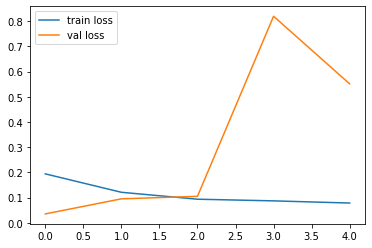

<Figure size 432x288 with 0 Axes>

In [18]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

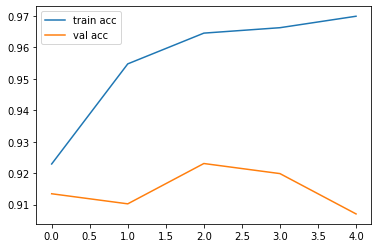

<Figure size 432x288 with 0 Axes>

In [19]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
import tensorflow as tf

In [21]:
from keras.models import load_model

In [22]:
model.save('model_vgg19.h5')


In [25]:
## Predicitng Models


from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model = load_model('model_vgg19.h5')
img = image.load_img('Datasets/val/PNEUMONIA/person1951_bacteria_4882.jpeg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes)

[[0. 1.]]


In [26]:
## Predicitng Models


from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model = load_model('model_vgg19.h5')
img = image.load_img('Datasets/val/NORMAL/NORMAL2-IM-1436-0001.jpeg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes)

[[1.0000000e+00 4.0595587e-36]]
